In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data=pd.read_csv("/kaggle/input/titanic/train.csv")
test_data=pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


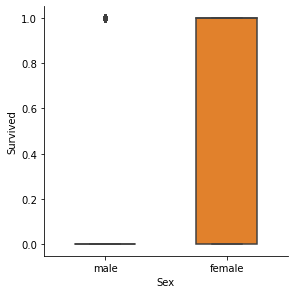

In [5]:
sns.catplot(x="Sex",y="Survived", data=train_data, kind="box", width=0.5, height=4)

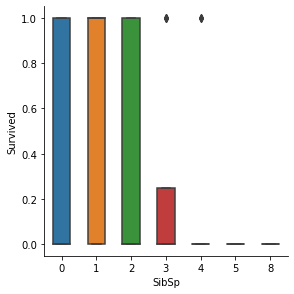

In [6]:
sns.catplot(x="SibSp", y="Survived", data=train_data, kind="box", width=0.5, height=4)

In [7]:
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_data["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [9]:
train_data["Pclass"].value_counts().to_frame()

,Pclass
3,491
1,216
2,184


In [10]:
train_data.groupby(["Pclass","Sex"]).Survived.mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


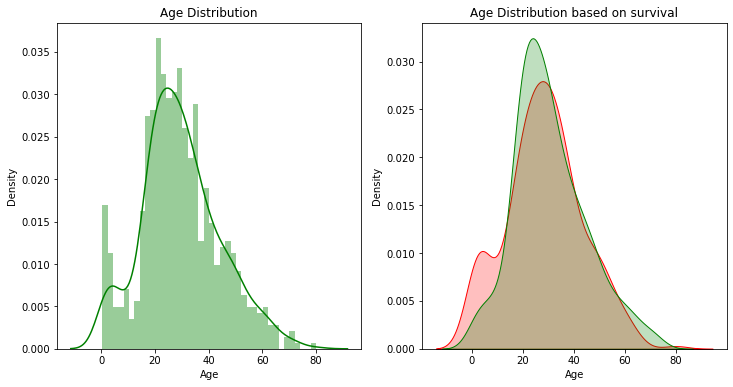

In [11]:
fig,axr=plt.subplots(1,2,figsize=(12,6))
axr[0].set_title("Age Distribution")
axr[1].set_title("Age Distribution based on survival")
f=sns.distplot(train_data["Age"],color='g',bins=40,ax=axr[0])
g=sns.kdeplot(train_data["Age"].loc[train_data["Survived"]==1], color='r', label="Survived", ax=axr[1], shade=True)
g=sns.kdeplot(train_data["Age"].loc[train_data["Survived"]==0], color='g', label="Not Survived", ax=axr[1], shade=True)

In [12]:
train_data.loc[train_data.Fare==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [13]:
def RemoveZero_Fare(row):
    if(row.Fare==0):
        row.Fare=np.NaN
    return row
train_data=train_data.apply(RemoveZero_Fare,axis=1)
test_data=test_data.apply(RemoveZero_Fare,axis=1)

print('Number of Zeros: {:d}'.format(train_data.loc[train_data.Fare==0].shape[0]))
        

Number of Zeros: 0


In [14]:
train_data["Title"]=train_data["Name"].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_data["Title"]=test_data["Name"].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [15]:
train_data["Title"].value_counts().to_frame()

,Title
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Col,2
Major,2
Lady,1


In [16]:
test_data['Title'].value_counts().to_frame()

,Title
Mr,240
Miss,78
Mrs,72
Master,21
Col,2
Rev,2
Dona,1
Dr,1
Ms,1


In [17]:
train_data["Title"].replace(['Mme','Lady','Ms','Mlle','Dona','the Countess'],'Miss', inplace=True)
test_data["Title"].replace(['Mme','Lady','Ms','Dona','Mlle','the Countess'],'Miss', inplace=True)

train_data["Title"].replace(['Col','Don','Major','Jonkheer','Sir','Capt'],'Mr',inplace=True)
test_data["Title"].replace(['Col','Don','Major','Jonkheer','Sir','Capt'],'Mr',inplace=True)


In [18]:
train_data.groupby('Title').Survived.mean()

Title
Dr        0.428571
Master    0.575000
Miss      0.707447
Mr        0.160000
Mrs       0.792000
Rev       0.000000
Name: Survived, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


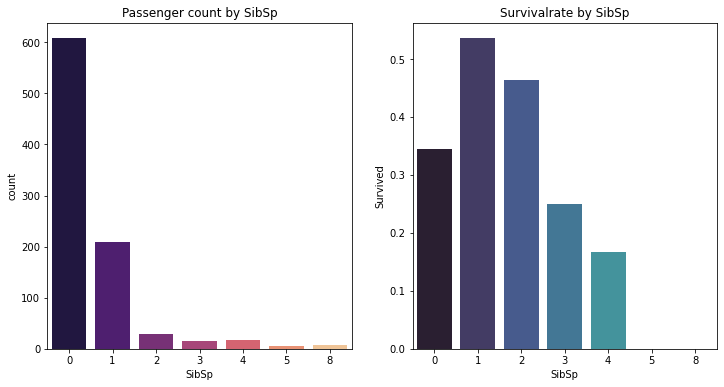

In [19]:
fig,axr=plt.subplots(1,2,figsize=(12,6))
a=sns.countplot(train_data['SibSp'],ax=axr[0],palette='magma').set_title('Passenger count by SibSp')
axr[1].set_title('Survivalrate by SibSp')
b=sns.barplot(x='SibSp', y="Survived", palette='mako',data=train_data, ax=axr[1],ci=None).set_ylabel('Survived')

<AxesSubplot:title={'center':'Survival rate'}, xlabel='SibSp', ylabel='count'>

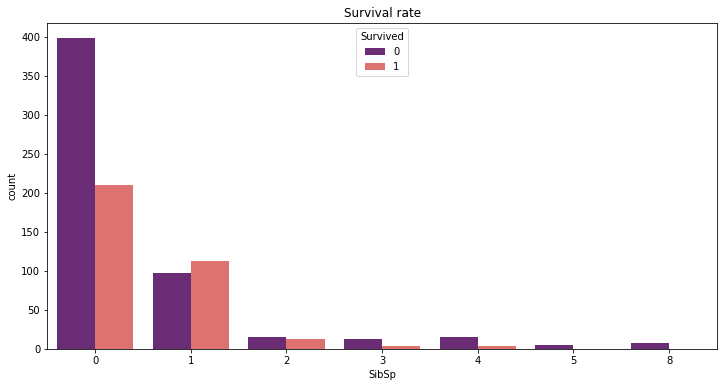

In [20]:
plt.figure(figsize=(12,6))
plt.title('Survival rate')
sns.countplot(x='SibSp', hue='Survived', data=train_data, palette='magma')



/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


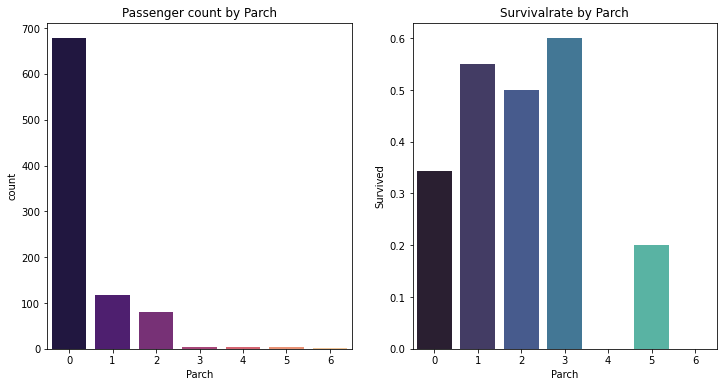

In [21]:
fig,axr=plt.subplots(1,2,figsize=(12,6))
a=sns.countplot(train_data['Parch'],ax=axr[0],palette='magma').set_title('Passenger count by Parch')
axr[1].set_title('Survivalrate by Parch')
b=sns.barplot(x='Parch', y="Survived", palette='mako',data=train_data, ax=axr[1],ci=None).set_ylabel('Survived')

<AxesSubplot:title={'center':'Survival rate'}, xlabel='Parch', ylabel='count'>

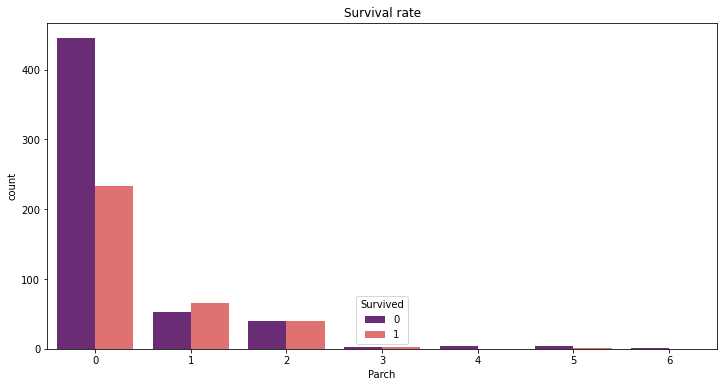

In [22]:
plt.figure(figsize=(12,6))
plt.title('Survival rate')
sns.countplot(x='Parch', hue='Survived', data=train_data, palette='magma')

In [23]:
train_data['Fam']=train_data['SibSp'] + train_data['Parch'] + 1
test_data['Fam']=test_data['SibSp'] + test_data['Parch'] + 1

In [24]:
train_data['Fam'].value_counts().to_frame()

,Fam
1,537
2,161
3,102
4,29
6,22
5,15
7,12
11,7
8,6


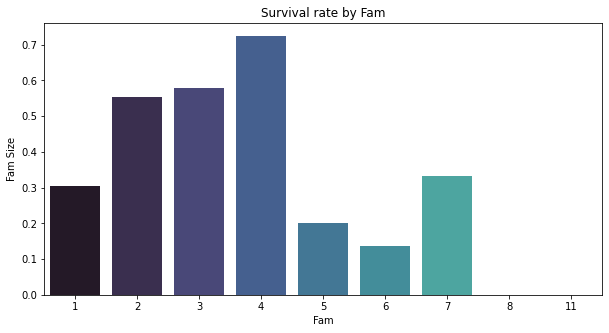

In [25]:
plt.figure(figsize=(10,5))
plt.title('Survival rate by Fam')
g=sns.barplot(x='Fam',y='Survived', data=train_data, palette='mako',ci=None).set_ylabel('Fam Size')

<AxesSubplot:title={'center':'Survival rate by family size'}, xlabel='Fam', ylabel='count'>

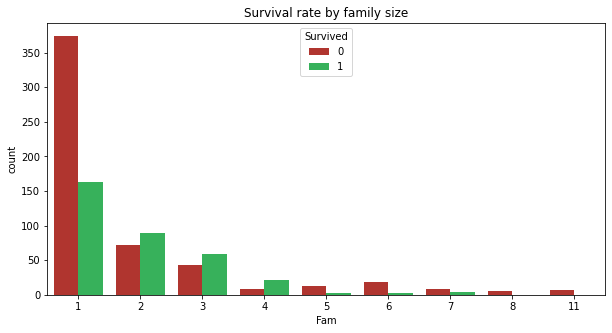

In [26]:
plt.figure(figsize=(10,5))
plt.title('Survival rate by family size')
sns.countplot(x='Fam', hue='Survived', data=train_data, palette=('#C52219', '#23C552'))


In [27]:
train_data['Fam_type']=pd.cut(train_data.Fam,[0,1,4,7,11],labels=['solo','small','big','very big'])
test_data['Fam_type']=pd.cut(test_data.Fam,[0,1,4,7,11],labels=['solo','small','big','very big'])

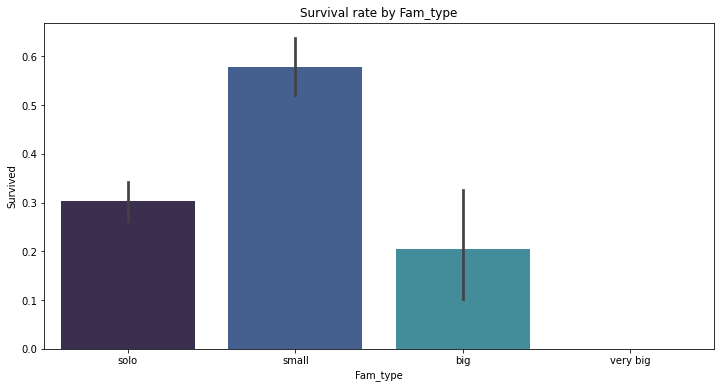

In [28]:
plt.figure(figsize=(12,6))
plt.title('Survival rate by Fam_type')
g=sns.barplot(x='Fam_type', y='Survived', data=train_data, palette='mako').set_ylabel('Survived')

In [29]:
train_data.describe()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         876 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Title        891 non-null    object  
 13  Fam          891 non-null    int64   
 14  Fam_type     891 non-null    category
dtypes: category(1), float64(2), int64(6), object(6)
memory usage: 98.6+ KB


In [30]:
train_data["Age"].fillna(train_data.Age.mean(),inplace=True)
test_data["Age"].fillna(test_data.Age.mean(),inplace=True)

test_data["Fare"].fillna(test_data.Fare.mean(),inplace=True)
train_data["Fare"].fillna(train_data.Fare.mean(),inplace=True)

train_data["Embarked"].fillna("S",inplace=True)

test_data.drop("Ticket",axis=1, inplace=True)

train_data.drop("Cabin",axis=1, inplace=True)
test_data.drop("Cabin",axis=1, inplace=True)




In [31]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    object  
 11  Title        891 non-null    object  
 12  Fam          891 non-null    int64   
 13  Fam_type     891 non-null    category
dtypes: category(1), float64(2), int64(6), object(5)
memory usage: 91.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

my_imputer=SimpleImputer()


Y=train_data["Survived"]

features=["Pclass","Fam_type","Title","Embarked","Fare"]
x=pd.get_dummies(train_data[features])
x_Test=pd.get_dummies(test_data[features])
Model=RandomForestClassifier(n_estimators=200,max_depth=5,random_state=1,oob_score=True)
Model.fit(x,Y)




RandomForestClassifier(max_depth=5, n_estimators=200, oob_score=True,
                       random_state=1)

In [33]:
Model.oob_score_

0.8249158249158249

In [34]:
predictions=Model.predict(x_Test)

In [35]:
output=pd.DataFrame({"PassengerId": test_data.PassengerId,"Survived": predictions})
output.to_csv('my_submission.csv',index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
